### Homework 4

Instructions:

For each of the problems below, Add the following things:
- Code to solve the problem
- Proof of acceptance/attempt (screenshot/link)
- Time Complexity
- Space Complexity
- Thought Process / Reflection on Challenges Faced
- Time Taken for that problem (leetcode provides builtin timer functionality)

**Problem 1:**
ZigZag Traversal

In [ ]:
from collections import deque

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def zigzagLevelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:

        if not root:
            return []
        
        result = []
        queue = deque([root])
        left_to_right = True
        
        while queue:
            level_size = len(queue)
            current_level = deque()
            
            for _ in range(level_size):
                node = queue.popleft()
                
                if left_to_right:
                    current_level.append(node.val)
                else:
                    current_level.appendleft(node.val)
                
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            
            result.append(list(current_level))
            left_to_right = not left_to_right
        
        return result
        

Proof of Acceptance / Attempt:

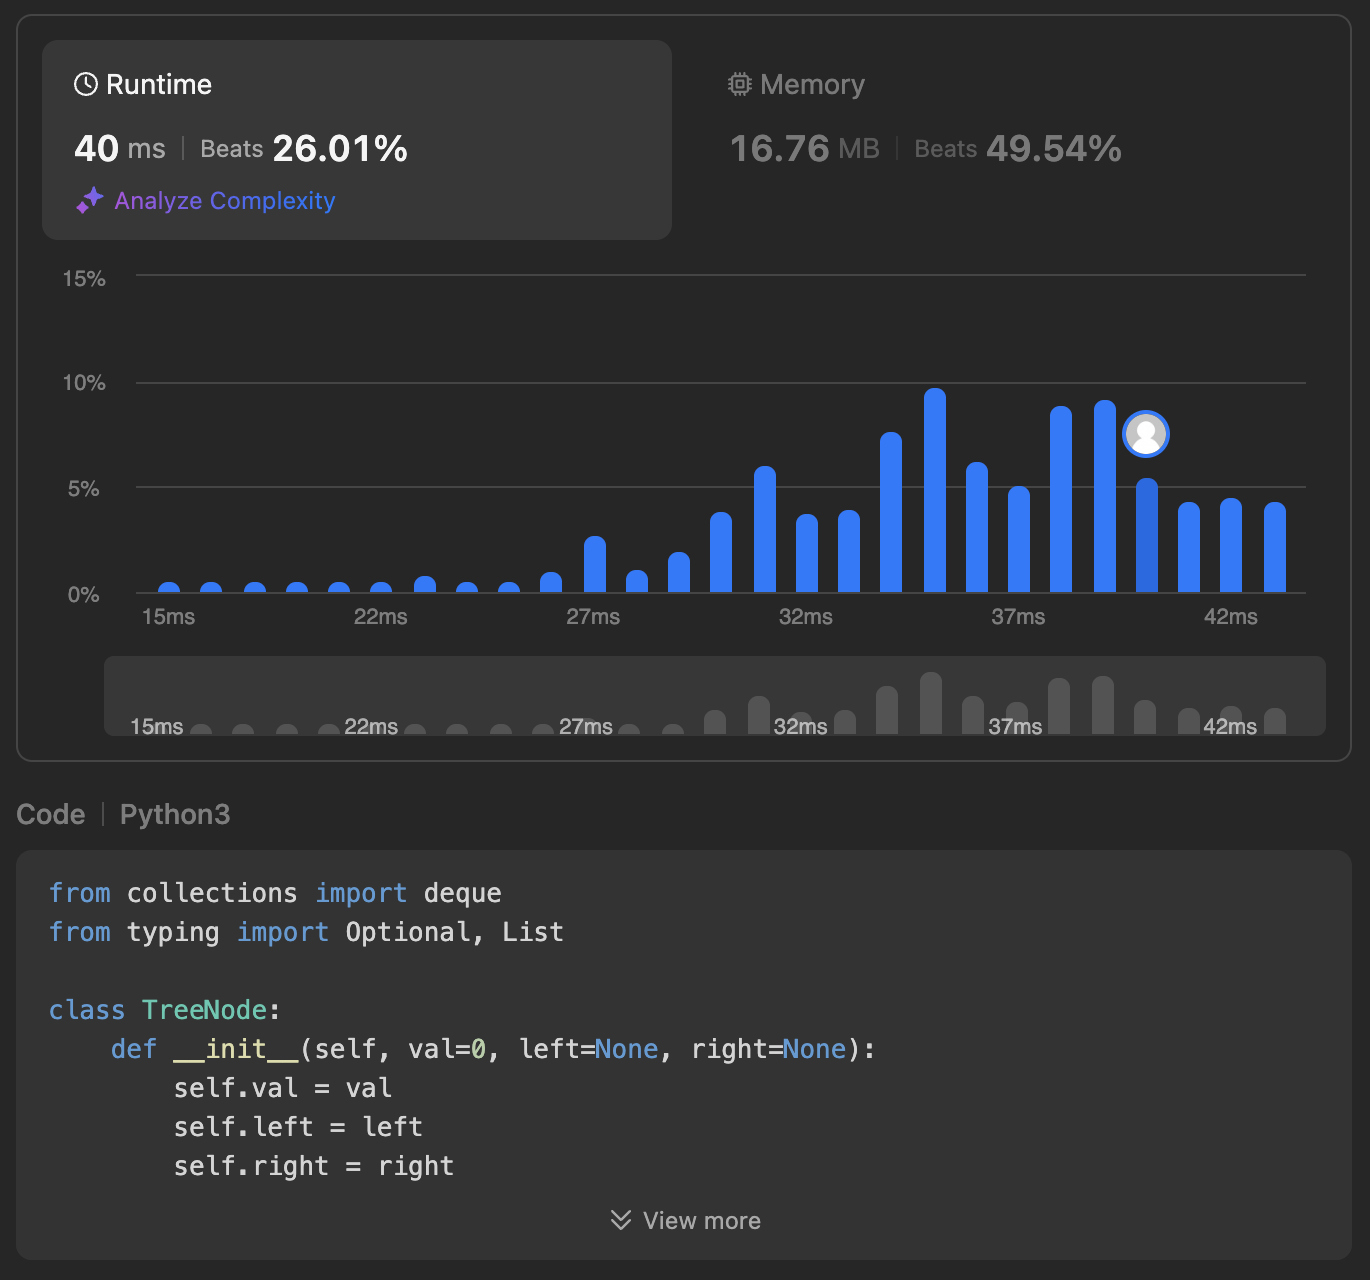
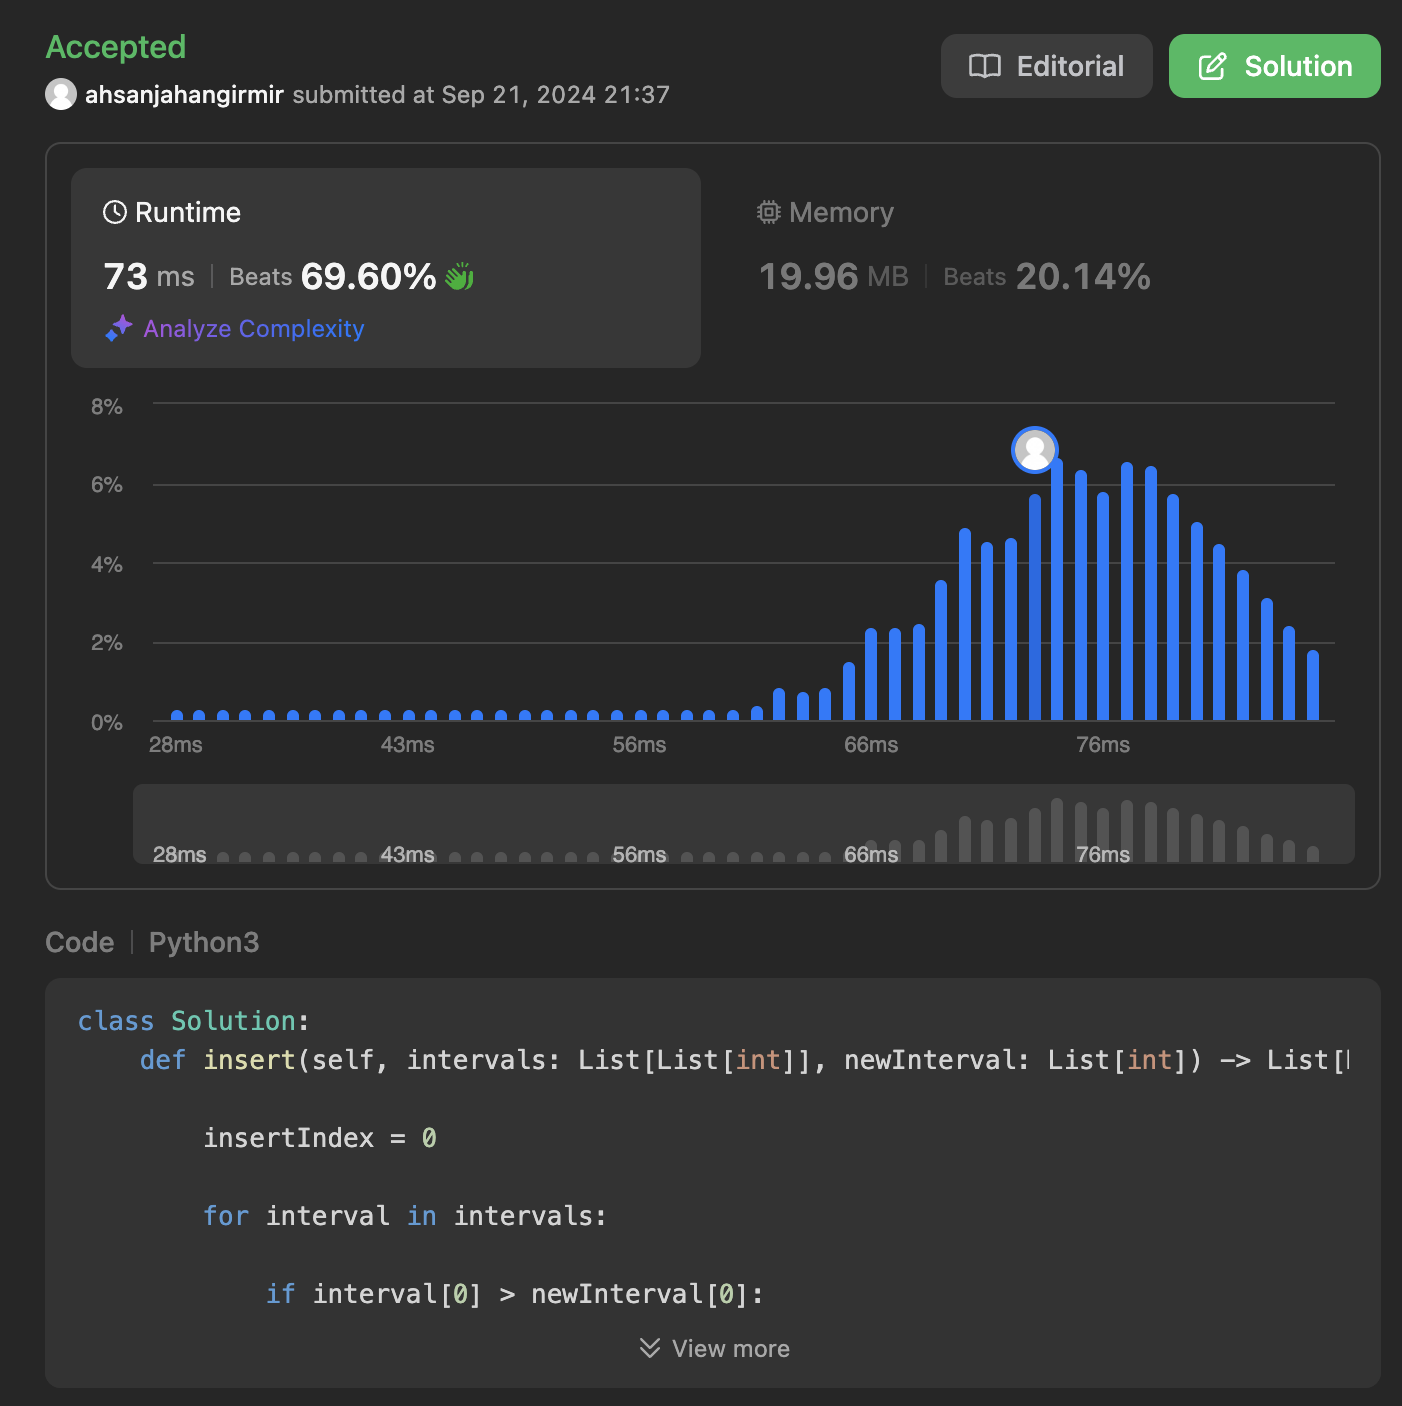

Thought Process / Reflection on challenges faced:

This problem was fairly simple with not many challenges because it relied solely on the implementation of merging overlaps. There was not much else to think about in terms of logic.  

Time Complexity

O(N)

Space Complexity

O(N)

Time Taken

18 minutes

**Problem 2:**
Flatten Binary Tree to Linked List

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def flatten(self, root: Optional[TreeNode]) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        self.prev = None

        def dfs(node: Optional[TreeNode]):
            
            if not node:
                return
            
            dfs(node.right)
            dfs(node.left)
            
            node.right = self.prev
            node.left = None
            self.prev = node

        dfs(root)

Proof of Acceptance / Attempt:

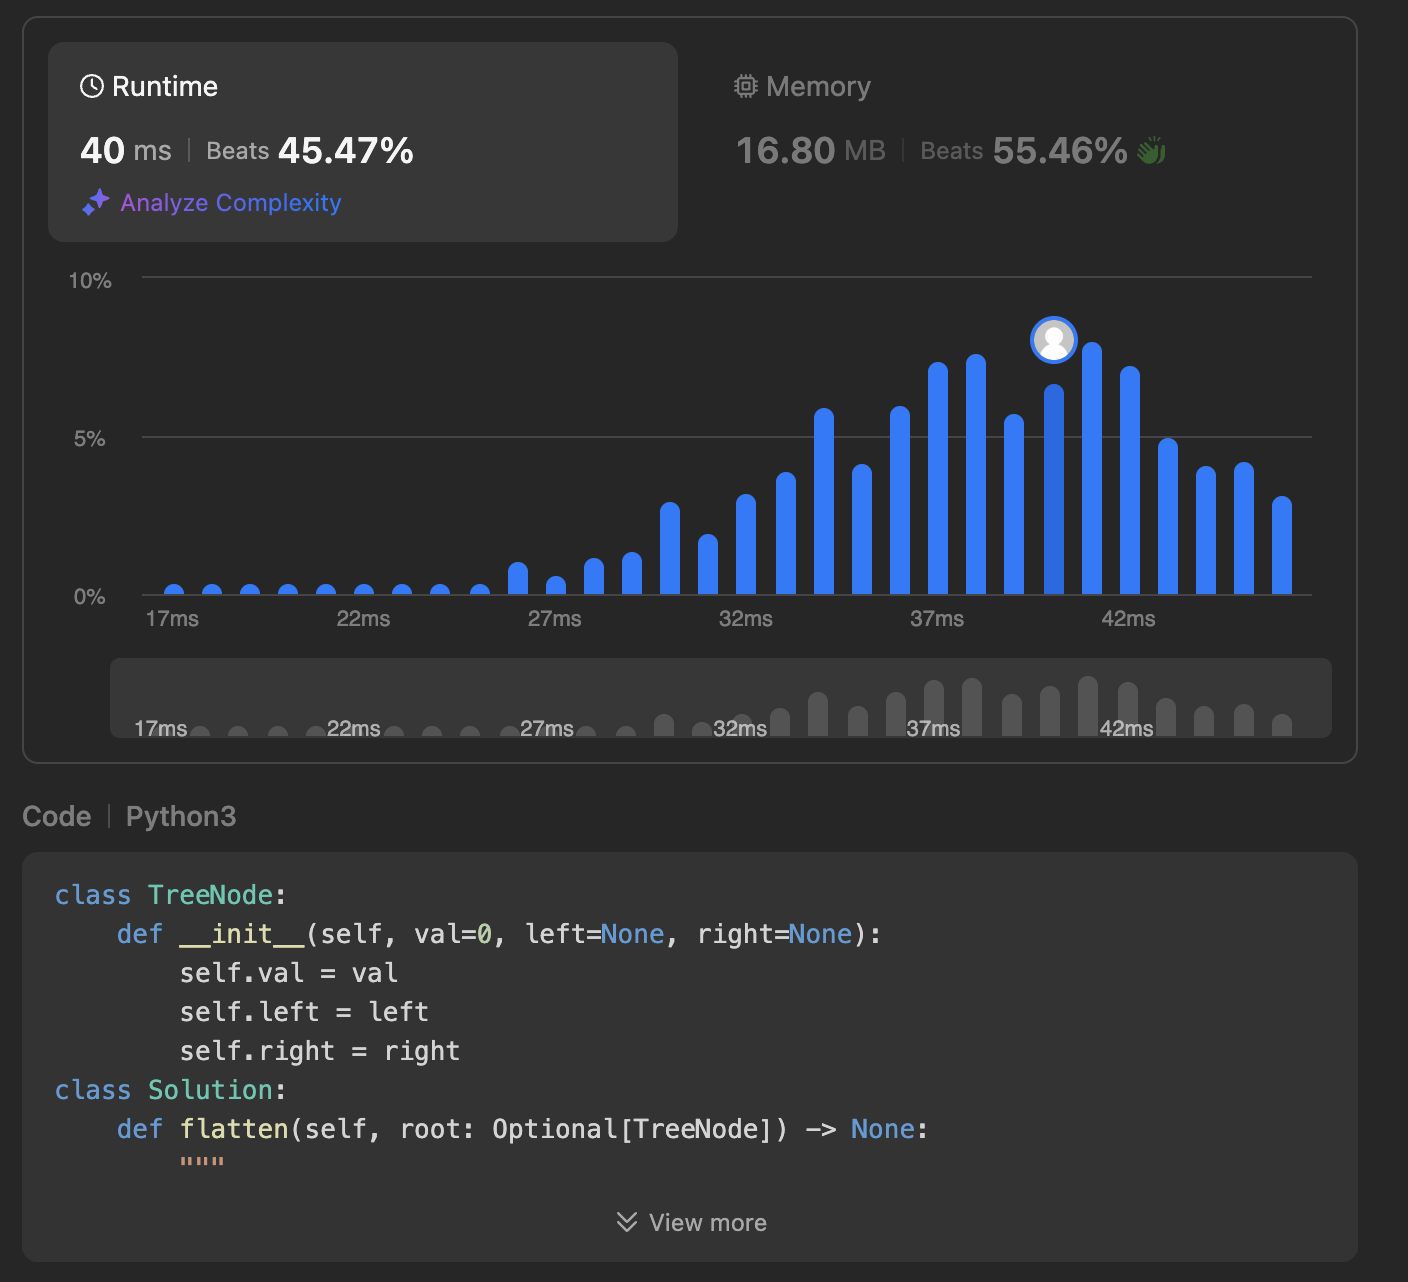
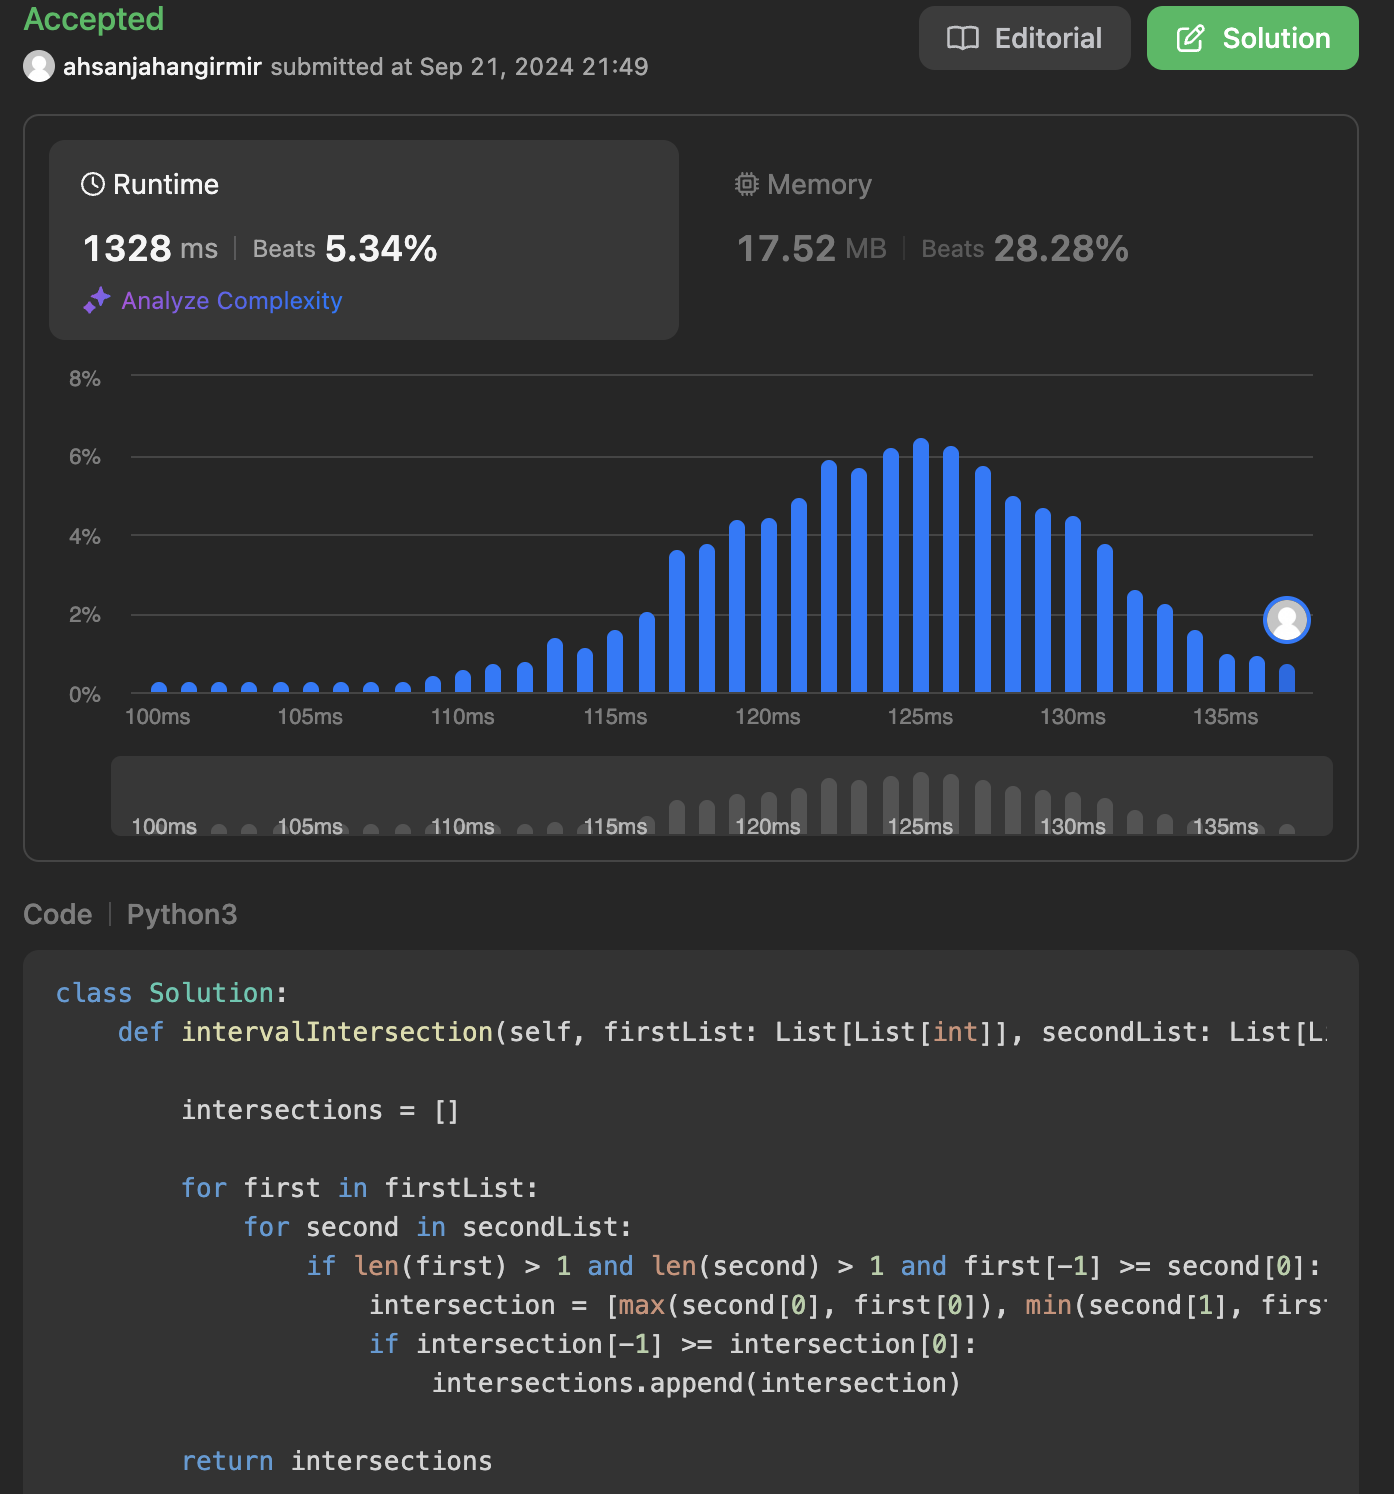

Thought Process / Reflection on challenges faced:

I checked if the end of the current interval from firstList was greater than or equal to the start of the current interval from secondList. If this condition was met, I calculated the intersection by taking the maximum of the start times and the minimum of the end times. I then verified that the end of the intersection was greater than or equal to the start to ensure it was a valid intersection before adding it to the results. 

Reflection: the code did become slow with the use of a nested loop which can be slow for very large inputs but the implementation was accepted so i did not attempt to change this because the code was more intuitive to trace for me this way.

Time Complexity

O(m * n) where m = len(firstList), n = len(secondList)

Space Complexity

O(m + n) where m = len(firstList), n = len(secondList)

Time Taken

19 minutes

**Problem 3:**
Path Sum III

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> int:
        
        def dfs(node, current_sum):
            
            if not node:
                return 0
            
            current_sum += node.val
            path_count = prefix_sums[current_sum - targetSum]
            prefix_sums[current_sum] += 1
            path_count += dfs(node.left, current_sum)
            path_count += dfs(node.right, current_sum)
            
            prefix_sums[current_sum] -= 1
            
            return path_count
    
        prefix_sums = defaultdict(int)
        prefix_sums[0] = 1
        
        return dfs(root, 0)

Proof of Acceptance / Attempt:

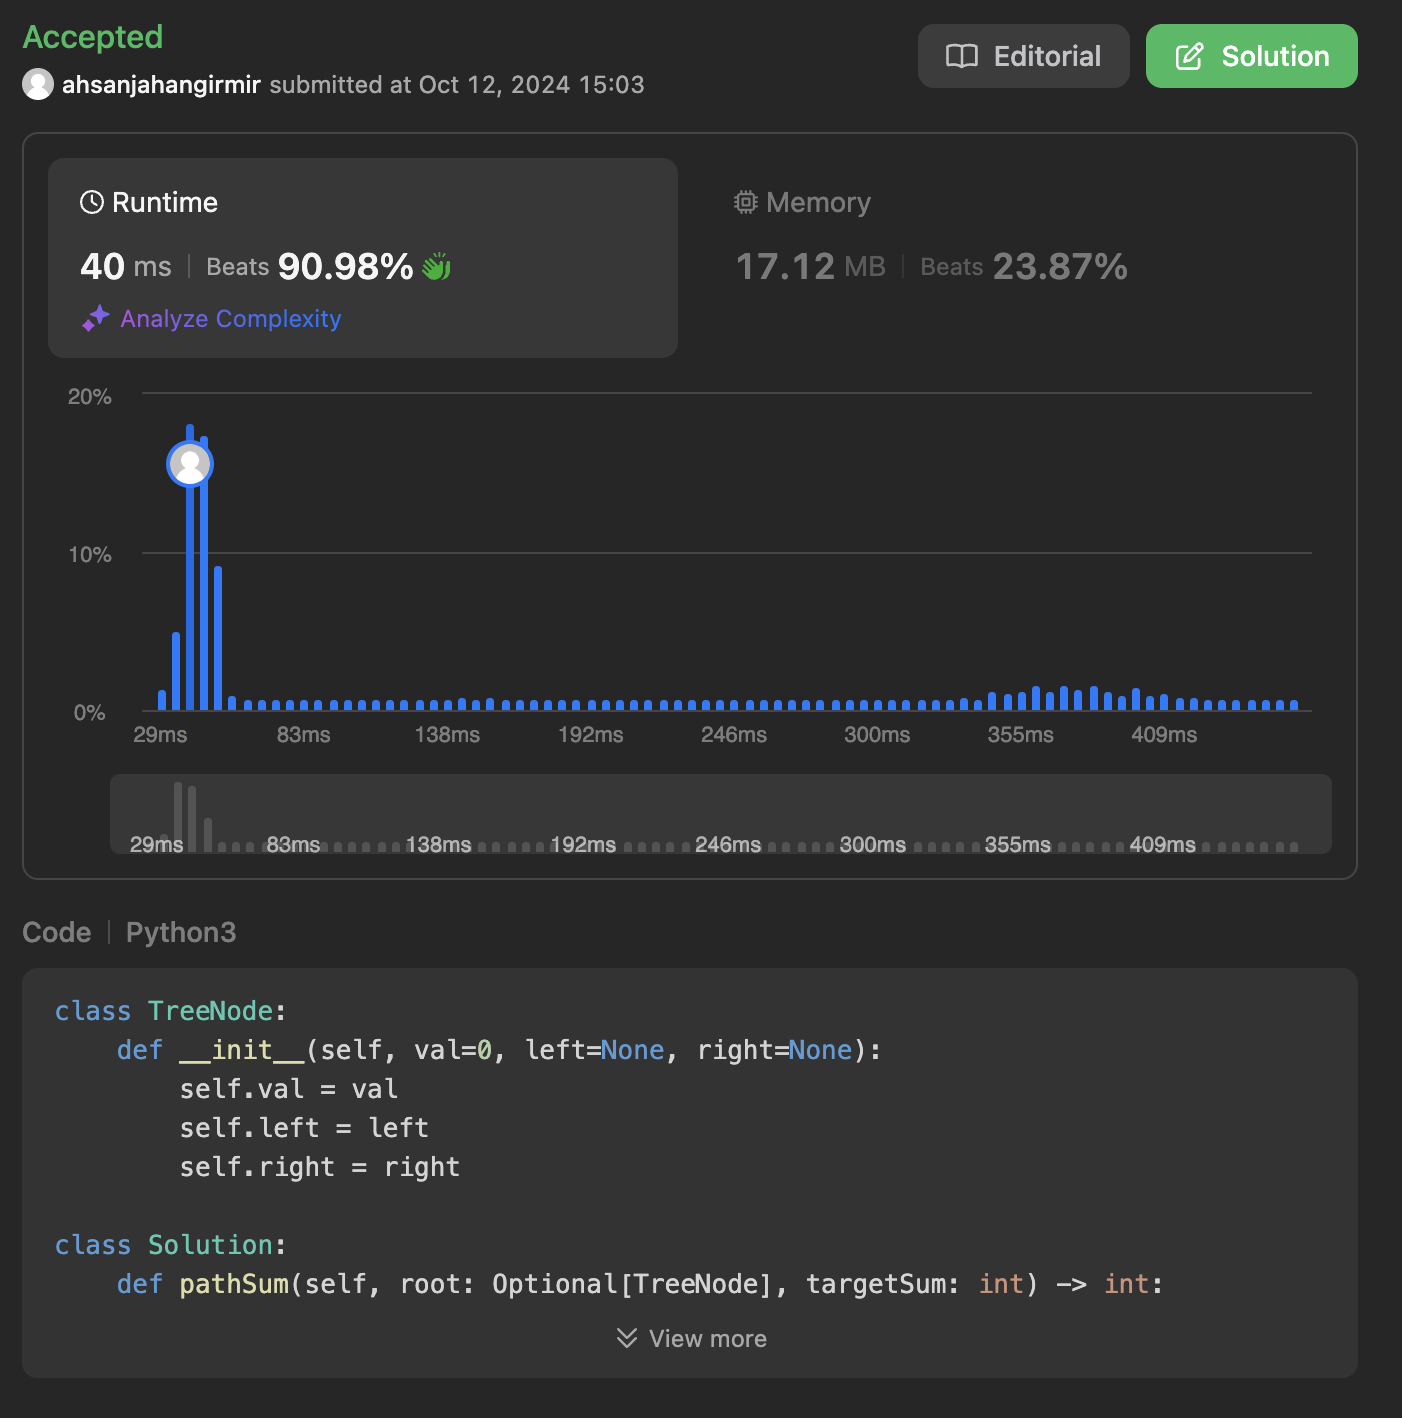
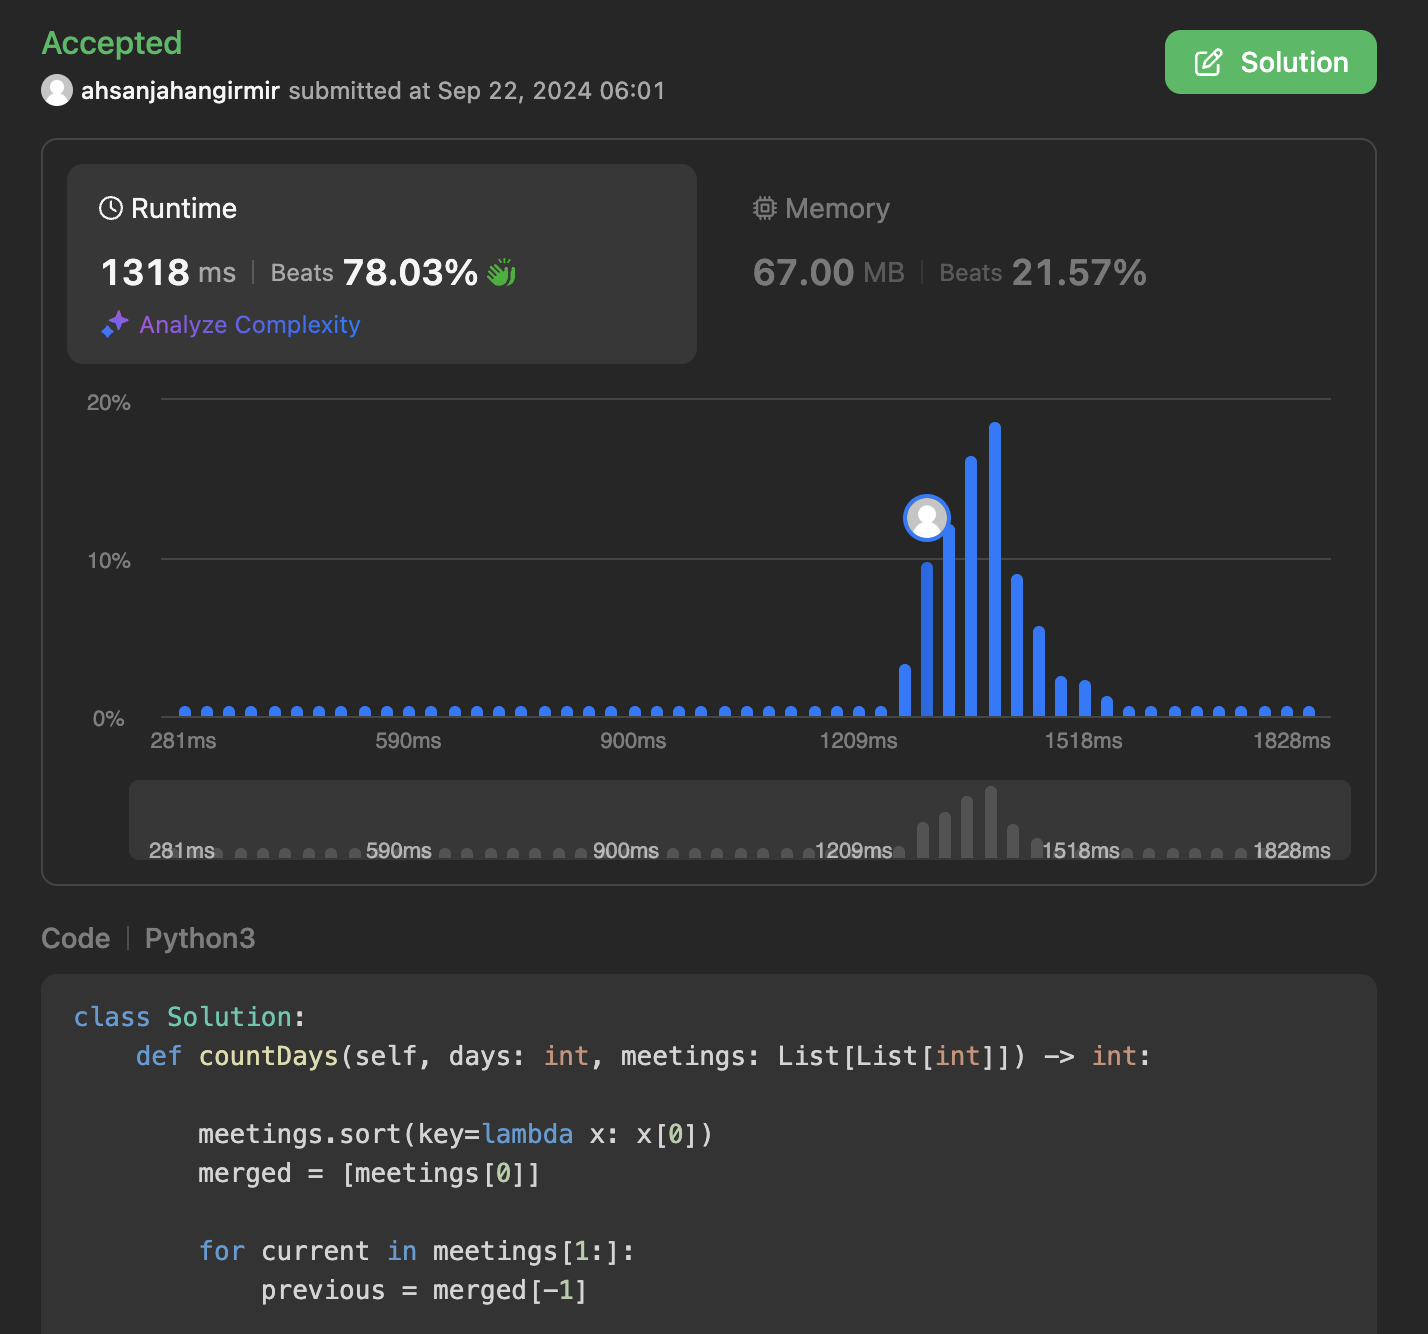

Thought Process / Reflection on challenges faced:

Initially, I wanted to create a method that calculates how many free days remain after scheduling meetings over a given number of days. My first approach was to track free days using a list where each index represented a day. I thought this would be a straightforward way to mark days as unavailable based on meeting schedules. I started by initializing a free list filled with True, indicating all days were free at the start. In the next step, I attempted to iterate through each meeting, marking the corresponding days in the free list as False. This method consumed a lot of memory, especially when the days input was large so i had to shift towards a more efficient solution. I took an approach that involved merging overlapping meetings. I sorted the meetings by their start days and created a merged list to consolidate overlapping or contiguous meetings. This way, I could easily calculate the number of occupied days by simply subtracting the total meeting days from the total available days. In the final loop, instead of trying to mark days directly in the free list, I calculated the number of occupied days by subtracting the range of each meeting from days.


Time Complexity

O(NlogN)

Space Complexity

O(N)

Time Taken

28 minutes

**Problem 4:**
Pacific Atlantic Water Flow

In [ ]:
class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        
        if not heights or not heights[0]:
            return []
        
        rows, cols = len(heights), len(heights[0])
        
        pacific_reachable = set()
        atlantic_reachable = set()
        
        def dfs(r, c, reachable):
            
            reachable.add((r, c))
            directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
            
            for dr, dc in directions:
            
                nr, nc = r + dr, c + dc
            
                if (0 <= nr < rows and 0 <= nc < cols and 
            
                    (nr, nc) not in reachable and 
                    heights[nr][nc] >= heights[r][c]):
                    dfs(nr, nc, reachable)
        
        for r in range(rows):
            dfs(r, 0, pacific_reachable)  
            dfs(r, cols - 1, atlantic_reachable)
        
        for c in range(cols):
            dfs(0, c, pacific_reachable)  
            dfs(rows - 1, c, atlantic_reachable)
        
        result = list(pacific_reachable & atlantic_reachable)

        return result


Proof of Acceptance / Attempt:

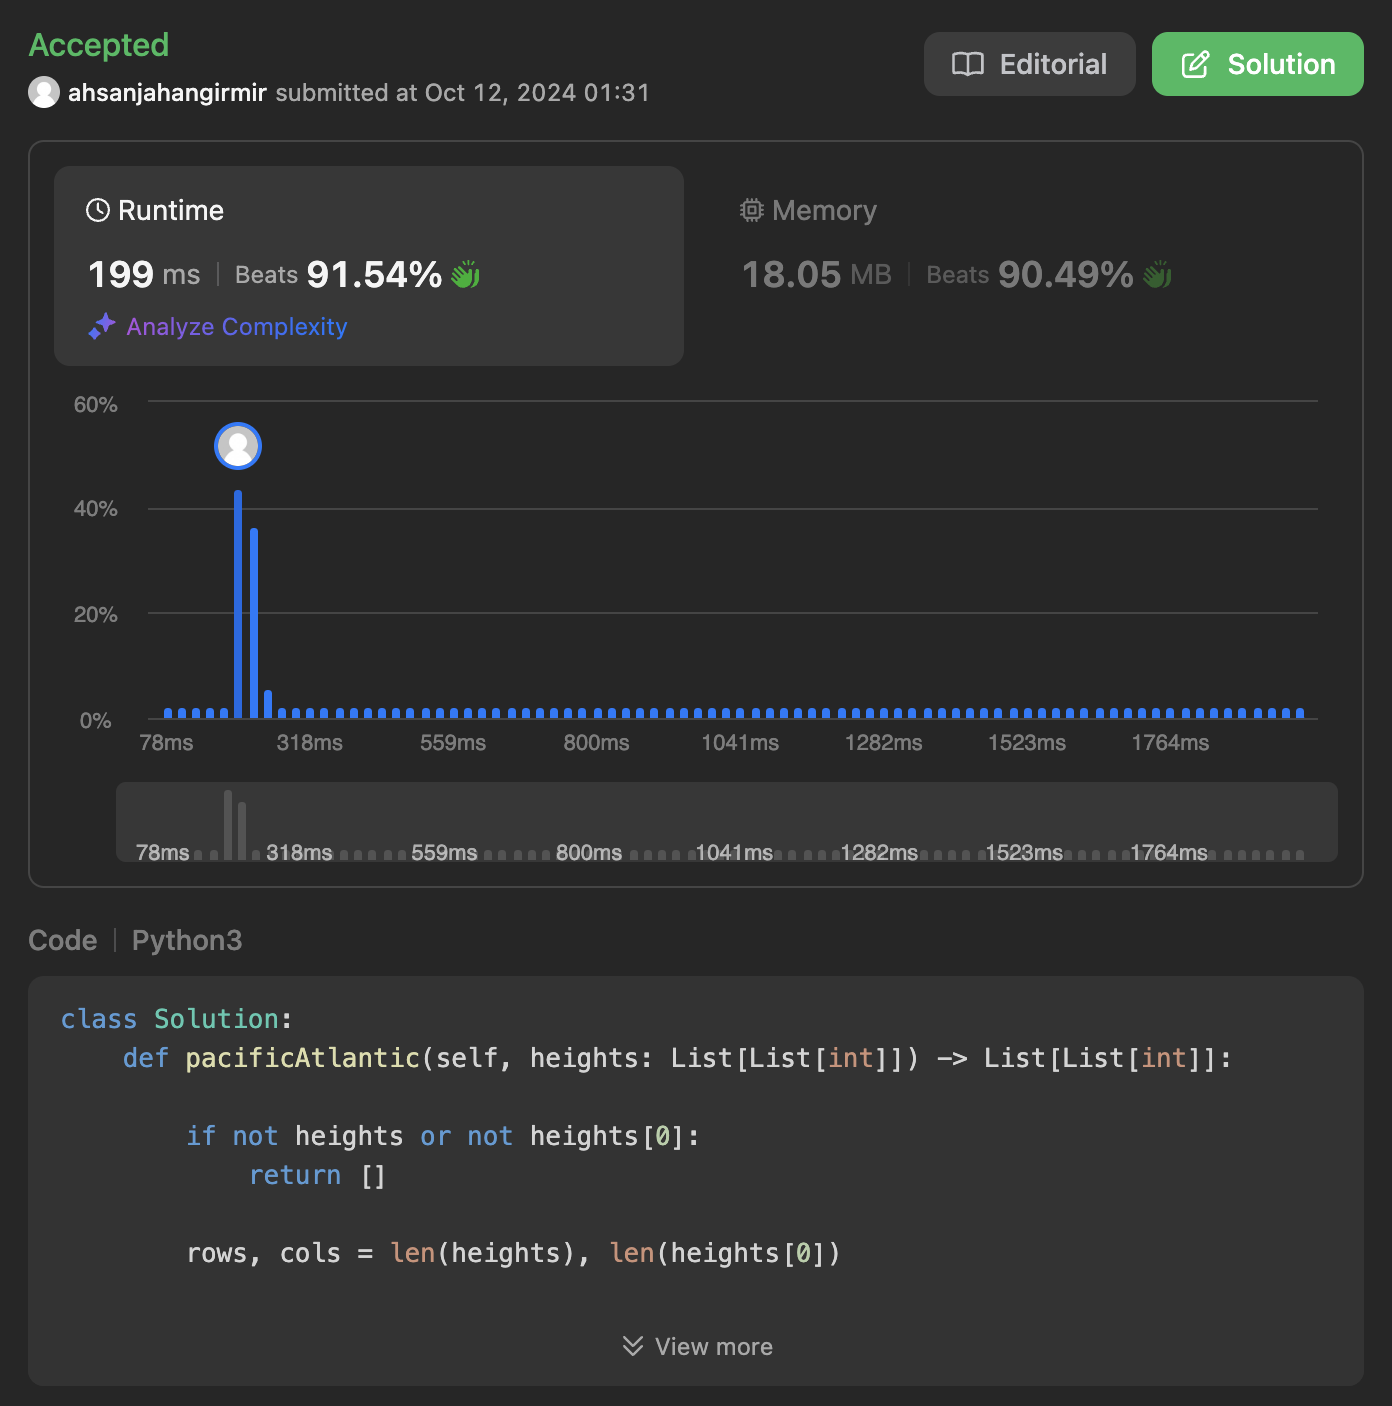
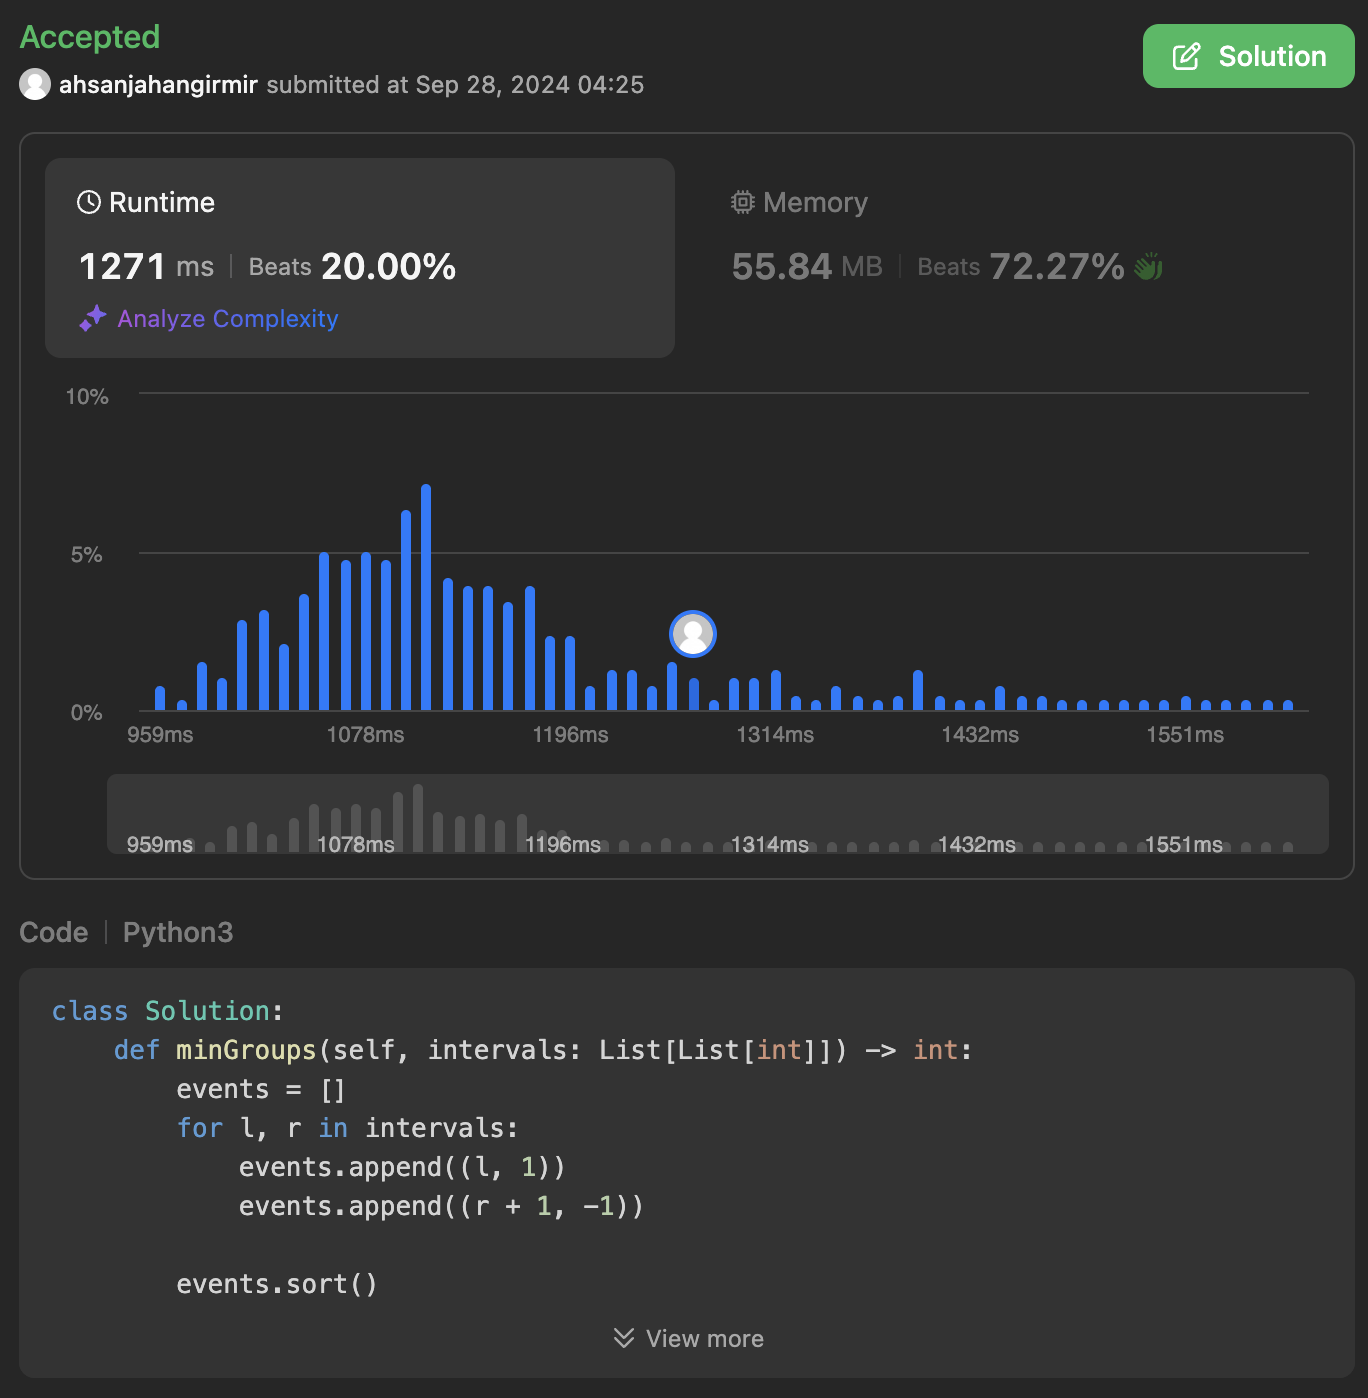

Thought Process / Reflection on challenges faced:

To determine the minimum number of groups required for non-intersecting intervals, I started focusing on sorting them and evaluating their overlap, aiming to find the fewest overlapping sets. I figured this could be possible if we could find the largest overlap. For finding minimum number of groups, I created an event list. For each interval [l, r], I add an event at l with delta +1 and at r+1 with delta -1. Sorting these events and processing them reveals the maximum current overlap, indicating the required groups. 

Challenges: tracking the maximum overlap in the second for loop using current_overlap. I found it difficult how to update max overlap in events but after a while, i was able to trace a tracking variable current_overlap to update the max overlap as i looped through deltas. 

Time Complexity

O (n log n)

Space Complexity

O(N)

Time Taken

48 minutes

**Problem 5:**
Populating Next Right Pointers in Each Node II

In [ ]:
from collections import deque

class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next

class Solution:
    def connect(self, root: 'Node') -> 'Node':
        
        if not root:
            return None
        
        queue = deque([root])
        
        while queue:
            
            size = len(queue)
            
            for i in range(size):
            
                node = queue.popleft()
            
                if i < size - 1:
                    node.next = queue[0]  
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
        
        return root

Proof of Acceptance / Attempt:

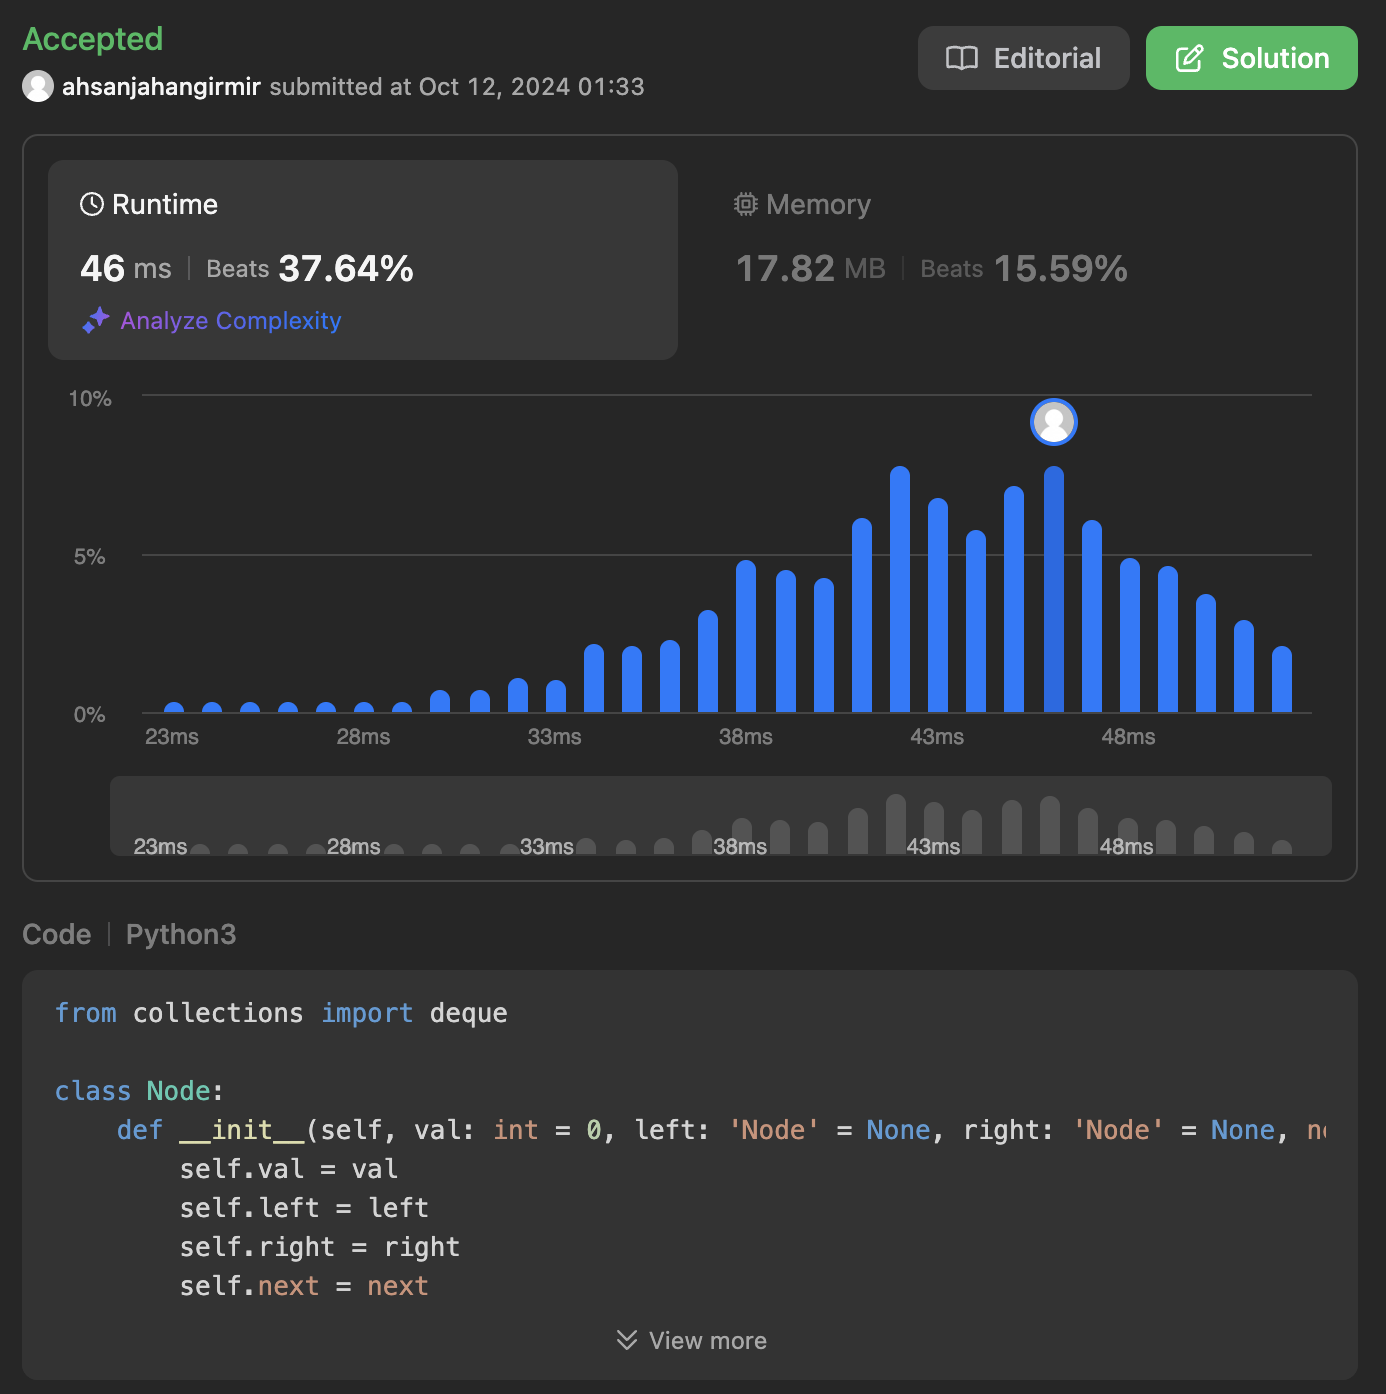
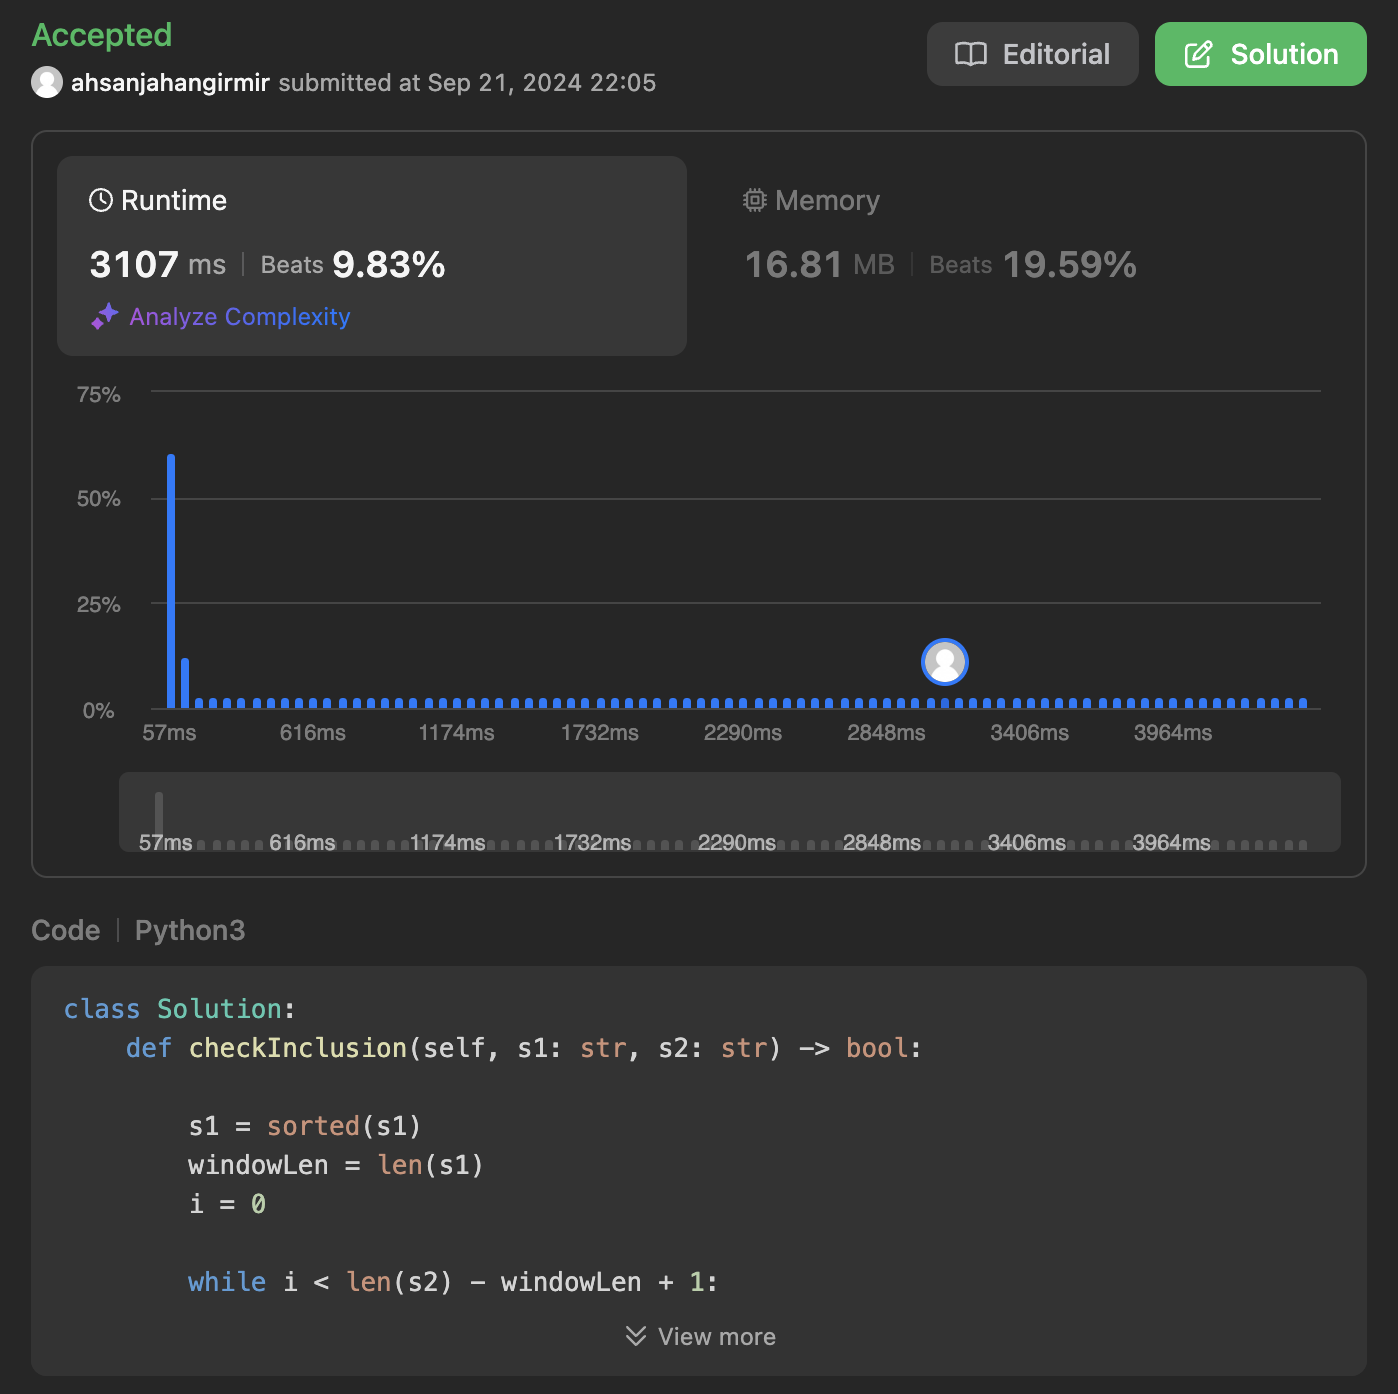

Thought Process / Reflection on challenges faced:

This problem was simple without any major challenges. I sorted s1 first, which allows me to compare it directly with sorted substrings of s2. By using a while loop, I iterated through s2, extracting each substring of length equal to s1 and sorting it to see if it matches s1. If I completed the loop without finding a match, I returned False.

The biggest challenge I faced was ensuring that the comparisons were efficient because sorting each substring within the loop was a costly nlogn operation, especially if s2 is very long but the problem didn't require strict efficiency, this simple solution worked for smaller input sizes, and I opted for clarity over optimization.

Time Complexity

O(n * m log m) -> m = len(s1) and n = len(s2)

Space Complexity

O(m)

Time Taken

24 minutes